#**Trabalho 3 - Inteligência Artificial**

#**Grupo**

Nome: Jhon Wislin Ribeiro Citron - RA: 776852

Nome: Vinícius Melo da Silva - RA: 769722

Escolha do conjunto de dados a ser utilizado, no caso, foi escolhido a classificação de medicamentos a partir da seguinte base de dados: https://www.kaggle.com/datasets/prathamtripathi/drug-classification

#**Objetivo:**

Analisar o conjunto de dados de forma a prever o tipo de medicamento.

Bibliotecas:

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

Leitura do arquivo .csv através da função pd.read_csv, e apresentação da base de dados utilizando a função head.

In [2]:
ConjDados = pd.read_csv("drug200.csv")

ConjDados.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Separação do conjunto de dados em matriz de atributos X através da função drop, que irá remover essa coluna do conjunto de dados, e vetor Y (Classe) será os tipos de medicamentos.

In [3]:
X = ConjDados.drop("Drug", axis=1)
Y = ConjDados["Drug"]

Transformação dos atributos nominais para binários através da função pd.get_dummies da biblioteca pandas.

In [4]:
X = pd.get_dummies(X)

Divisão do conjunto de dados (X, Y) em conjuntos de teste e treinamento através da função train_test_split.

In [5]:
TreinaX, TesteX, TreinaY, TesteY = train_test_split(X, Y, test_size=0.2, random_state=42)

Algorítimo de indução da árvore de decisão sendo aplicado no conjunto de treinamento (TreinaX, TreinaY).

In [6]:
ArvDec = DecisionTreeClassifier(criterion='entropy', random_state=42)
ArvDec.fit(TreinaX, TreinaY)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Plotagem da árvore de decisão, onde, a função plot_tree vai gerar a figura da árvore e a função plt.plot vai plotar a figura da árvore.

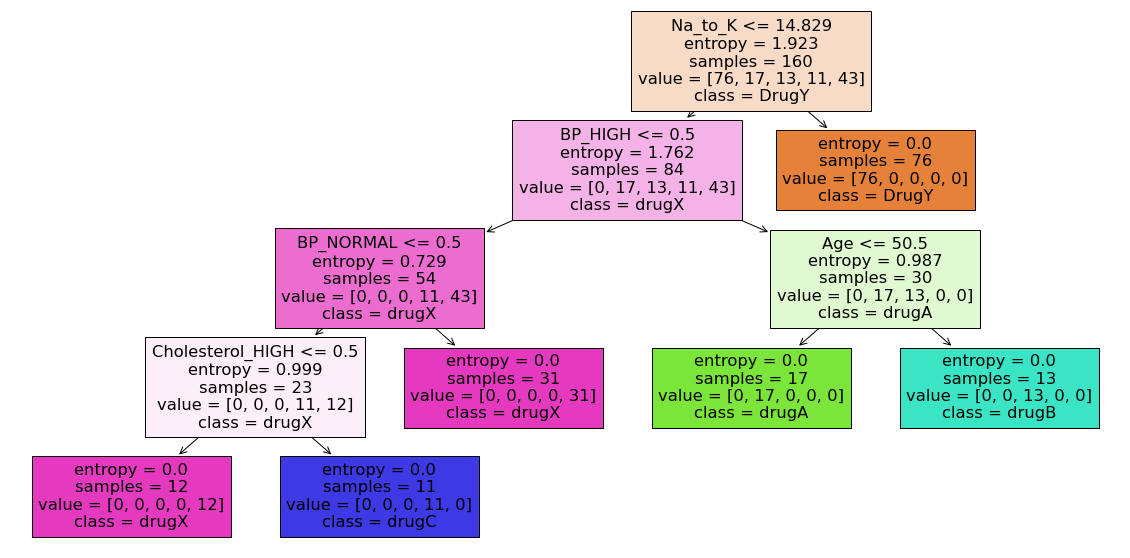

In [7]:
plt.figure(figsize=(20,10))
plot_tree(ArvDec, filled=True, feature_names=X.columns, class_names=ArvDec.classes_)
plt.show()

Abaixo é mostrado a classificação dos dados a partir da função predict. Onde, a função predic vai fazer a predição em cima de TesteX, através da árvore de decisão ArvDec.

In [8]:
Predic = ArvDec.predict(TesteX)

Abaixo é mostrado a matriz de confusão construída a partir da previsão feita em Predic, e os cálculos da Acurácia, Precisão, Revocação e Medida-f a partir da matriz de confusão (MatrizConf).

In [9]:
MatrizConf = confusion_matrix(TesteY, Predic)
print("Matriz de Confusão:")
print(MatrizConf)

AC = (MatrizConf[0,0]+MatrizConf[1,1]+MatrizConf[2,2]+MatrizConf[3,3]+MatrizConf[4,4])/MatrizConf.sum()
Prec = MatrizConf.diagonal()/MatrizConf.sum(axis=0)
Rev = MatrizConf.diagonal()/MatrizConf.sum(axis=1)
MF = 2*(Prec*Rev)/(Prec+Rev)

print('Acurácia: {:.2f}'.format(AC))
print('Precisão: {:.2f}'.format(Prec.mean()))
print('Revocação: {:.2f}'.format(Rev.mean()))
print('Medida-F: {:.2f}'.format(MF.mean()))

Matriz de Confusão:
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
Acurácia: 1.00
Precisão: 1.00
Revocação: 1.00
Medida-F: 1.00
